In [1]:
import os
import sys
sys.path.append('../')
from utils import camb_clfile
import matplotlib.pyplot as plt
import curvedsky as cs
import healpy as hp

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG

In [3]:
nside = 512
cl_len = camb_clfile('/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lensed_dls.dat')

In [25]:
outfolder = os.path.join(os.environ['SCRATCH'],"FREQ_TEST")
infolder = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/'
dnside = 512
maskpath8 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits'
fwhm = 30
fg_dir = '/global/cscratch1/sd/lonappan/S4BIRD/FG'
fg_str = "s0d0"
table = "LITEBIRD_V1"
cl_len = '/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lensed_dls.dat'
sim_nocut = SimExperimentFG(infolder,outfolder,dnside,maskpath8,fwhm,fg_dir,fg_str,table,cl_len)
sim_cut = SimExperimentFG(infolder,outfolder,dnside,maskpath8,fwhm,fg_dir,fg_str,table,cl_len,80,200)

using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/FREQ_TEST


using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/FREQ_TEST


In [16]:
sim_nocut.table

,level_0,index,frequency,depth_p,fwhm,bandwidth,pixel_size,detectors,net_det,net_arr_t,net_arr_p
0,0,0,40.0,37.42,70.5,0.30,18.0,114,172,18.0,25.5
1,1,1,50.0,33.46,58.5,0.30,18.0,114,96,11.5,16.3
2,2,2,60.0,21.31,51.1,0.23,18.0,114,79,9.5,13.5
3,3,3,68.0,16.87,47.1,0.23,18.0,114,64,7.8,11.0
4,4,4,78.0,12.07,43.8,0.23,18.0,114,54,6.5,9.2
5,5,5,89.0,11.30,41.5,0.23,18.0,114,47,5.6,8.0
6,6,6,100.0,6.56,37.8,0.23,12.0,296,59,4.4,6.2
7,7,7,119.0,4.58,33.6,0.30,12.0,222,42,3.7,5.2
8,8,8,140.0,4.79,30.8,0.30,12.0,296,38,2.8,4.0
9,9,9,166.0,5.57,28.9,0.30,12.0,222,36,3.1,4.4


In [22]:
sim_cut.table

,level_0,index,frequency,depth_p,fwhm,bandwidth,pixel_size,detectors,net_det,net_arr_t,net_arr_p
5,5,5,89.0,11.30,41.5,0.23,18.0,114,47,5.6,8.0
6,6,6,100.0,6.56,37.8,0.23,12.0,296,59,4.4,6.2
7,7,7,119.0,4.58,33.6,0.30,12.0,222,42,3.7,5.2
8,8,8,140.0,4.79,30.8,0.30,12.0,296,38,2.8,4.0
9,9,9,166.0,5.57,28.9,0.30,12.0,222,36,3.1,4.4
10,10,10,195.0,5.85,28.6,0.30,12.0,296,37,2.8,3.9


In [21]:
noFG_alms = sim_nocut.get_noFG_alms(0)
FG_alms_cut = sim_cut.get_comp_sep_alm(0)
FG_alms_cut1 = sim_cut1.get_comp_sep_alm(0)

In [20]:
noFG_cinv = sim_nocut.get_cinv_sim(0,True)
FG_cinv_cut = sim_cut.get_cinv_sim(0)
FG_cinv_cut1 = sim_cut1.get_cinv_sim(0)

/tmp/ipykernel_32607/3235298047.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/sim_nocut.cl_len[2,:])


(100000000000000000, 10000000000000000000)

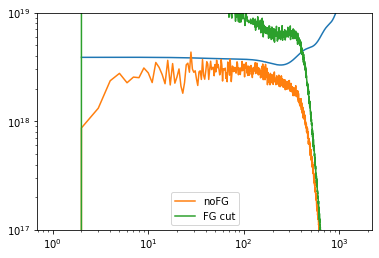

In [10]:
plt.loglog(1/sim_nocut.cl_len[2,:])
plt.loglog(cs.utils.alm2cl(sim_nocut.lmax,noFG_cinv[1])/sim_nocut.fsky,label='noFG')
plt.loglog(cs.utils.alm2cl(sim_cut.lmax,FG_cinv_cut[1])/sim_cut.fsky,label='FG cut')

plt.legend()
plt.ylim(10**17,10**19)

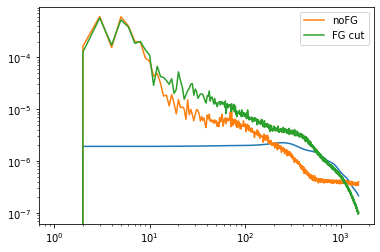

In [24]:
plt.loglog(sim_nocut.cl_len[2,:]*sim_nocut.Tcmb**2)
plt.loglog(hp.alm2cl(noFG_alms[2])/sim_nocut.fsky,label='noFG')
plt.loglog(hp.alm2cl(FG_alms_cut[2])/sim_cut.fsky,label='FG cut')

plt.legend()